In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

In [3]:
import matplotlib 
matplotlib.rcParams['figure.figsize']=(12,8)

In [4]:
import numpy as np
import rasterio as rio 
import matplotlib.pyplot as plt 

In [70]:
with rio.open('/content/drive/MyDrive/PDI - Python/PDI PYTHON/Arquivos/L71221071_07120010720_DN.tif') as src:
  b1 = src.read(1)
  b2 = src.read(2)
  b3 = src.read(3)
  b4 = src.read(4)
  b5 = src.read(5)
  b7 = src.read(6)


In [71]:
def expansao(img, percent_min =2, percent_max =98):
  
  #gerando uma imagem com as mesmas dimenções da img recebida
  img2 = np.zeros_like(img)
  
  #variaveis que são dependentes de quantos bits é a img recebida, nesse caso é de 8, logo a sera de 0 a 255 
  x,y = 0,255 
  
  #colentando os percentis
  pmin = np.percentile(img, percent_min)
  pmax = np.percentile(img, percent_max)
  
  #função de transfêrencia linear
  f = x + (img - pmin) * (y - x) / (pmax - pmin)
  f[f<x] = x 
  f[f>y] = y
  img2 = f 
  
  return img2

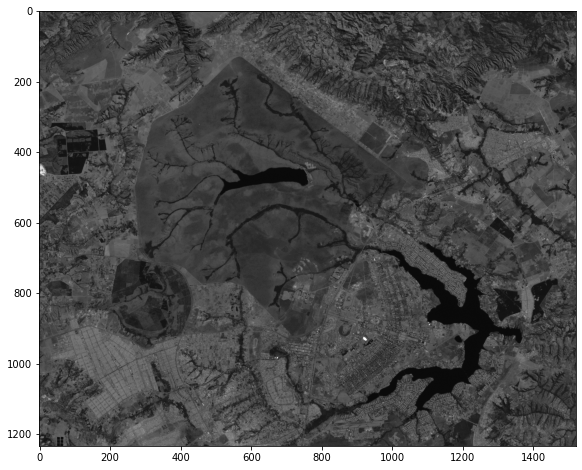

In [72]:
plt.imshow(b7,cmap='Greys_r')

In [73]:
#somando as bandas e formando uma pancromática
pan = b1 + b2 + b3 

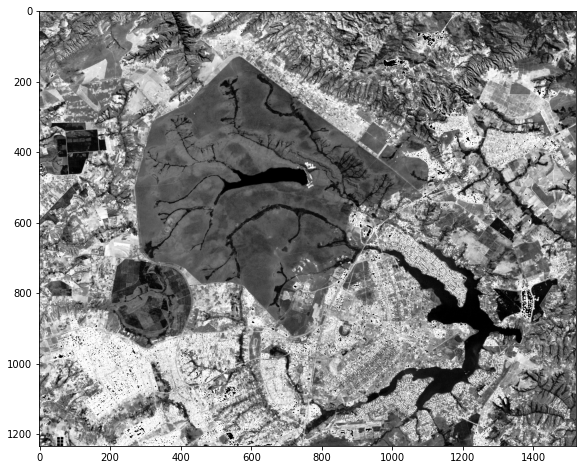

In [74]:
plt.imshow(expansao(pan),cmap='Greys_r')

In [75]:
# Subtraindo para resaltar as áreas urbanas 

sub = b4 - b3 

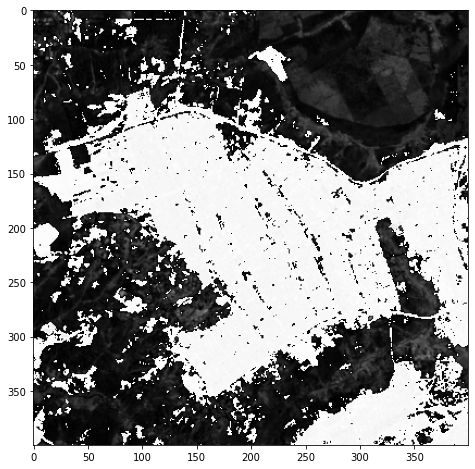

In [76]:
plt.imshow(sub[800:1200,0:400],cmap='Greys_r')

In [56]:
# Razão 

ndvi = (b4 - b3) / (b4 + b3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


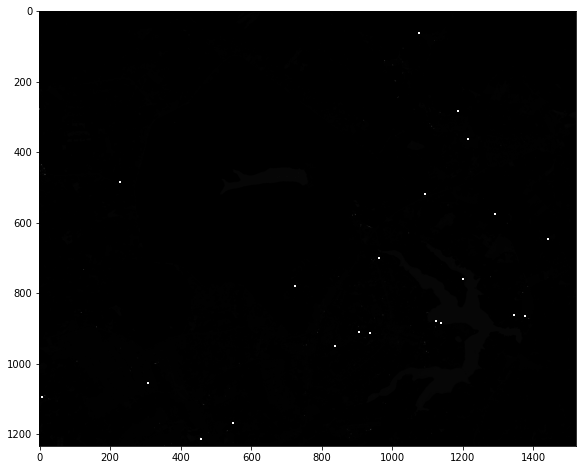

In [79]:
plt.imshow(ndvi, cmap = 'Greys_r')

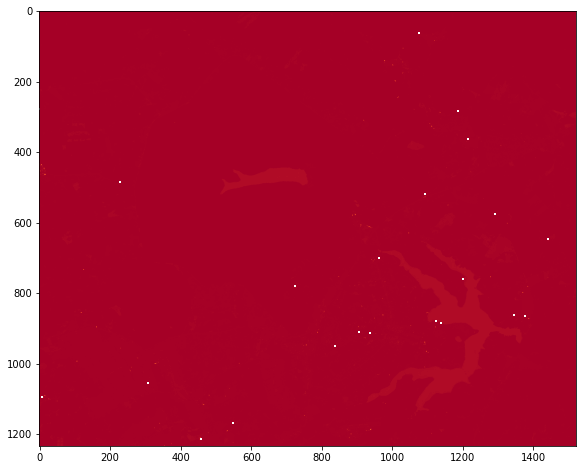

In [78]:
plt.imshow(ndvi, cmap='RdYlGn')

In [80]:
#Multiplicação 

pri = (b1 - b2) / (b1 + b2)
spri = (pri + 1) / 2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


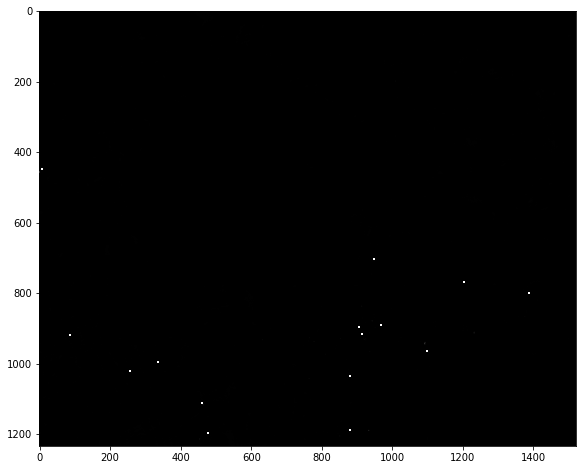

In [82]:
plt.imshow(spri, cmap = 'Greys_r')

In [84]:
CO2flux = (ndvi * spri)

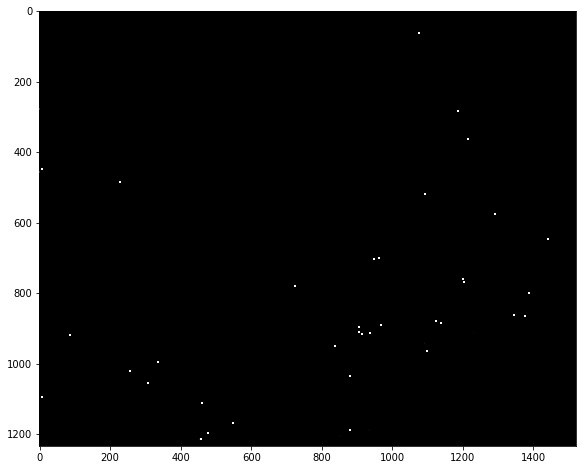

In [85]:
plt.imshow(CO2flux, cmap = 'Greys_r')